## Gradient descent for neural network with one hidden layer

Parameters: 

$$w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}$$

If $$n_{x} = n^{[0]}, n^{[1]}, n^{[2]}$$ where $$n^{[2]} = 1$$

Then size of 

$$w^{[1]} = (n^{[1]},n^{[0]} )$$

$$b^{[1]} = (n^{[1]},1) $$

$$w^{[2]} = (n^{[2]},n^{[1]} )$$

$$b^{[2]} = (n^{[2]},1) $$

Cost function: Binary classification

$$ J(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]})  = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)})$$


### Gradient descent

Forward Propogation

$$ Z^{[1]} = W^{[1]}X + b^{[1]} $$
$$ A^{[1]} = g^{[1]}(Z^{[1]})$$
$$ Z^{[2]} = W^{[2]}X + b^{[2]} $$
$$ A^{[2]} = g^{[2]}(Z^{[2]})$$
 If binary classification, $g^{[2]}$ = sigmoid

Backward propogation

$$dZ^{[2]} = A^{[2]} - Y$$ 
where, $Y = [y^{(1)}, y^{(2)}, ..... y^{(m)}]$

$$dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T}$$

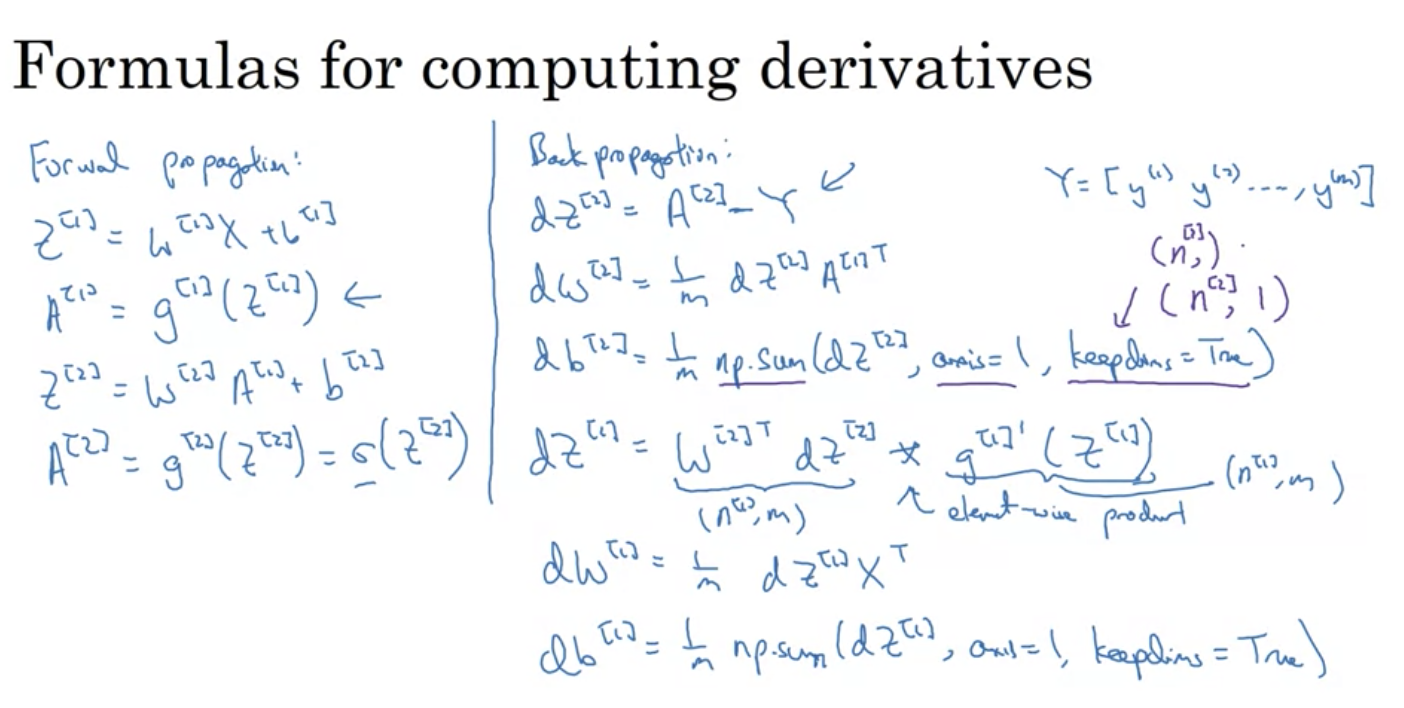

In [3]:
from IPython import display
display.Image( "../images/3_computing_derivatives.png")

## Computing gradients

### Backward Propogation (general equations)

1. da
$$ da = \frac{\partial L(a,y) }{\partial a} $$

$$ da = \frac{\partial}{\partial a} (-y\log a - (1-y)\log(1-a))  =-\frac{y}{a} + \frac{1-y}{1-a} $$

2. dz

$$ dz = \frac{\partial L(a,y) }{\partial z} = \frac{\partial L(a,y) }{\partial a} \frac{\partial a }{\partial z}  = da . g^{'}(z)$$

3. dw

$$ dw = \frac{\partial L(a,y) }{\partial w} = xdz$$

4. db

$$ db = dz $$


### Backward Propogation Neural Network with 2 layers


### 1. For output layer
$$dz^{[2]} = a^{[2]} - y$$
$$dw^{[2]} = dz^{[2]}a^{[1]T}$$
$$db^{[2]} = dz^{[2]} $$
### 2. For hiddne layer
$$dz^{[1]} = w^{[2]T}dz^{[2]}.g^{[1]'}(z^{[1]}) $$
$$dw^{[1]} = dz^{[1]}x^{[1]T}$$
$$db^{[1]} = dz^{[1]} $$

### In vaectorized form 

$$dz^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]^T} $$
$$db^{[2]} = \frac{1}{m}np.sum(dZ^{[2]}, axis = 1, keepdims=True) $$
$$dZ^{[1]} = W^{[2]^T}dZ^{[2]}* g^{[1]'}(Z^{[1]})$$ [Element wise]
$$dW^{[1]} = \frac{1}{m}dZ^{[1]}X^{[1]^T} $$
$$db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis = 1, keepdims=True) $$


**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In practice, you'll often build helper functions to compute steps 1-3, then merge them into one function called `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.